In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from instruments.utils import *
import time

In [13]:
file_name = '../test2'
file = file_name + '.h5'
ref = 5.87045 
step = 0.0002
window     = 100           #length of half of the interval on x axis
step       = 0.0002        #length of a single step during the frequency sweep (GHz)

In [ ]:
trigger = dict(
    trigger_type   = 'IMMEDIATE', #'EDGE', 'IMMEDIATE' or 'DIGITAL'
    trigger_source = '0',
    trigger_slope  = 'POSITIVE', #'POSITIVE' or 'NEGATIVE'
    trigger_level  = '0.0',
    trigger_delay  = '0.0'
)

daq =  PXIeSignalAcq("PXI1Slot2", trigger=trigger, records=1, channels=[0,1], sample_rate=5e7, length=1000)
with FSWSynt("COM12") as synt:
    print(synt.get_ID())
    
    for i in range(-window, window):
        freq = ref + i*step
        print(synt.set_freq(freq))
        time.sleep(0.005)
        #print(synt.get_freq(freq))
        print(i)
        daq.acq()   #DA TESTARE
    
    daq.storage_hdf5(file_name + '.h5')

daq.close()

In [8]:
I, Q = get_hdf5(file)
print('%d frequencies considered, for each one %d points have been taken.' %(len(I), len(I[0])))

100 frequencies considered, for each one 1000 points have been taken.


In [ ]:
I_mean, Q_mean = get_mean(file)
big_plot_from_array(I_mean, Q_mean, ref, step)

In [ ]:
x = []
for i in range(-int(len(Q_mean)/2), int(len(Q_mean)/2)): 
    x.append(ref + i*step) 
#decide begin and end by looking at the plot
index_max = der_IQ(x, I_mean, Q_mean, begin = 50, end = 150, plot = True)

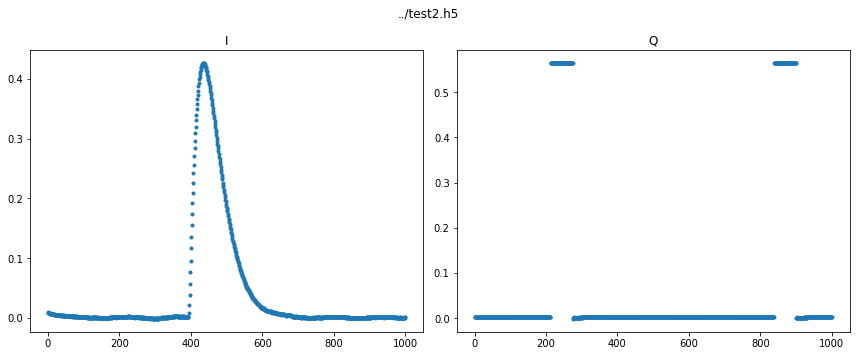

In [14]:
plot_hdf5(file, i = 63)

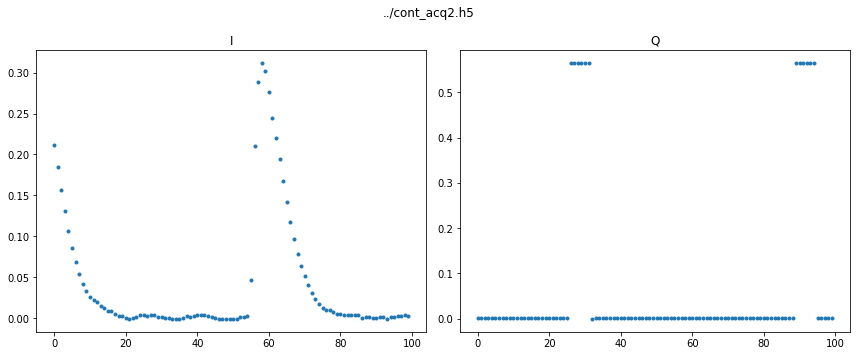

In [35]:
file_name = '../cont_acq2'
file = file_name + '.h5'
plot_hdf5(file, i = 0, begin = 0, end = 100)
I, Q = get_hdf5(file)

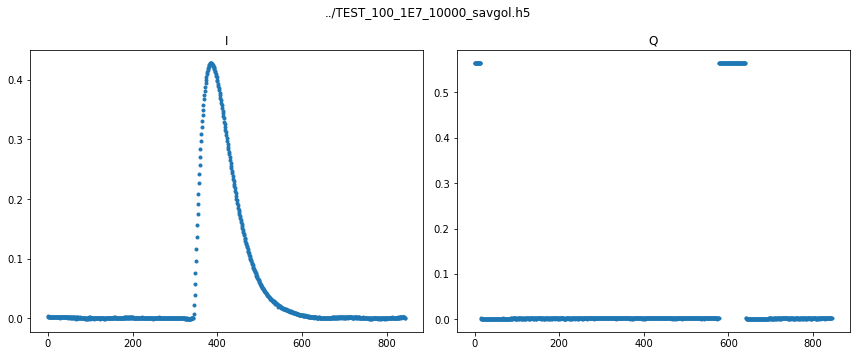

In [11]:
plot_hdf5(file, i = 63)

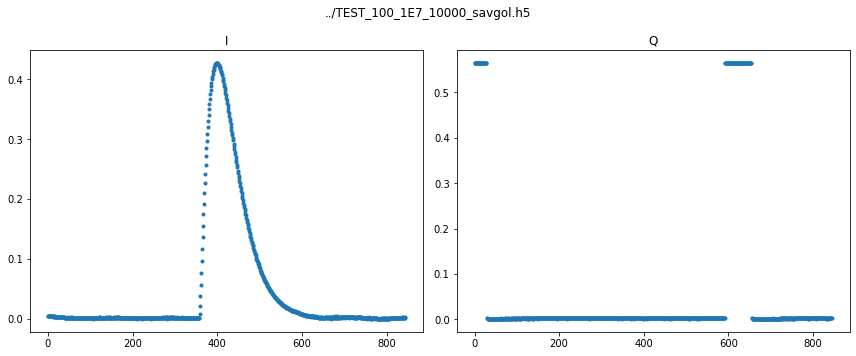

In [12]:
plot_hdf5(file, i = 64)

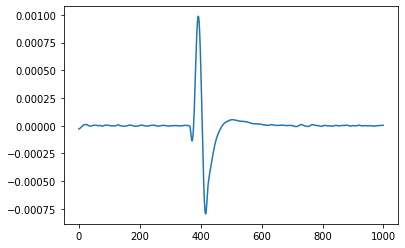

In [31]:
plt.plot(savgol_filter(I[-20], window_length=60, polyorder=4, deriv=2, delta=1, mode='mirror'))